In [1]:
import sys
sys.path.append('../30_data_tools/')

In [14]:
import plotly.express as px
import json
from datetime import datetime
import pandas as pd

In [3]:
from file_interaction import download_blob, get_blobs
import plotly.graph_objects as go

In [4]:
available_experiments = get_blobs(filter='train_logs/')
available_experiments

['train_logs/2024-04-02_resnet50.json',
 'train_logs/2024-04-02_resnet50_001.json',
 'train_logs/2024-04-02_resnet50_002.json',
 'train_logs/2024-04-03_resnet50_001.json',
 'train_logs/2024-04-03_resnet50_002.json',
 'train_logs/2024-04-03_resnet50_003.json',
 'train_logs/2024-04-03_resnet50_004.json']

In [5]:
def load_experiment( experiment_name ):
    json_buffer = download_blob( f'train_logs/{ experiment_name }.json' )
    data = json.loads( json_buffer.getvalue() )
    data['start_timestamp'] = datetime.fromisoformat(data['start_timestamp'])

    if 'end_timestamp' in data:
        data['end_timestamp'] = datetime.fromisoformat(data['end_timestamp'])

    for t in data['tracked_metrics']:
        t['timestamp'] = datetime.fromisoformat(t['timestamp'])
        t['value'] = float(t['value'])
    
    return data

In [37]:
def get_figure( data, metric_name, mode ):
    fig = px.line(
        x=data.loc[(data.metric_name == metric_name) &  (data['mode'] == mode)].step,
        y=data.loc[(data.metric_name == metric_name) &  (data['mode'] == mode)].value,
        color=data.loc[(data.metric_name == metric_name) &  (data['mode'] == mode)].epoch
    )
    fig.update_layout(yaxis_range=[0,1])
    
    return fig

In [50]:
experiment_name = '2024-04-03_resnet50_004'
experiment_data = load_experiment( experiment_name )
data = pd.DataFrame.from_dict(experiment_data['tracked_metrics'])

In [48]:
experiment_data['hyper_parameters']

{'epochs': 25,
 'learning_rate': 0.0001,
 'batch_size': 64,
 'loss_function': 'CrossEntropyLoss',
 'metric_functions': ['MulticlassAccuracy',
  'MulticlassRecall',
  'MulticlassPrecision'],
 'optimizer': 'SGD',
 'device': 'cuda'}

In [55]:
data.loc[data.epoch == 1].timestamp.describe()

/var/folders/ns/b_3z05zx1bz71dzh3qcvtpyh0000gq/T/ipykernel_32614/3954430095.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                            332
unique                           332
top       2024-04-03 16:40:49.103735
freq                               1
first     2024-04-03 16:40:49.103735
last      2024-04-03 16:49:43.569410
Name: timestamp, dtype: object

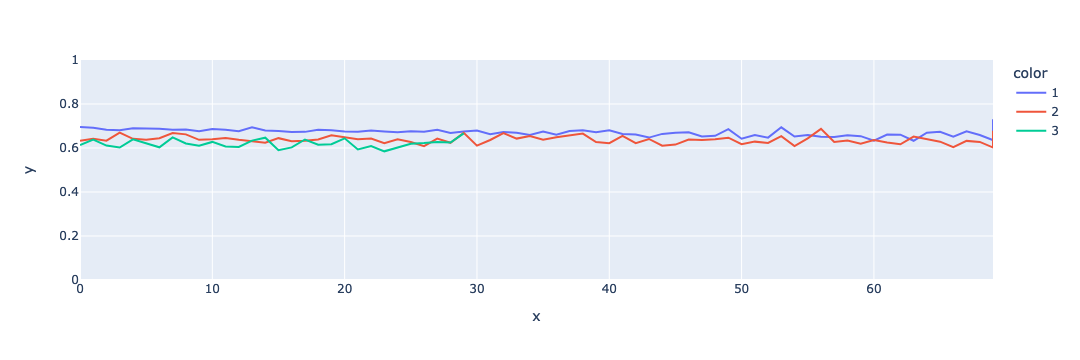

In [52]:
get_figure(
    data,
    'loss',
    'train'
)

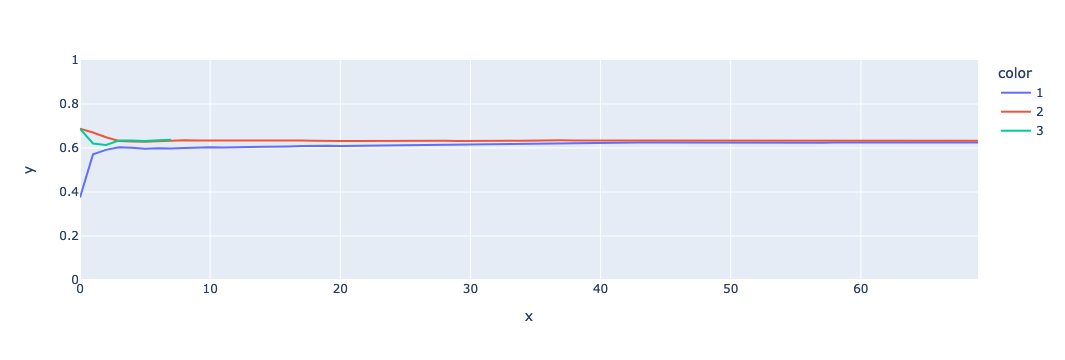

In [42]:
get_figure(
    data,
    'accuracy',
    'train'
)

In [ ]:
fig = px.scatter(
    x=[t['step'] for t in experiment_data['tracked_metrics'] if t['metric_name'] == 'loss' and t['mode'] == 'train'],
    y=[t['value'] for t in experiment_data['tracked_metrics'] if t['metric_name'] == 'loss' and t['mode'] == 'train']
)